<a href="https://colab.research.google.com/github/mbougha/Cours-RI/blob/main/Cours_RI_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cours Introduction à la Recherche d'Information à l'N7

Il existe différentes librairies sous Python pour analyser le texte. L'analyse peut consister à extraire les mots simples, jusqu'à l'analyse un peu plus "poussée", vecteurs de mots pondérés, représentations continues (LSI, LDA, embedings,..).
De manière générale le  "text processing" passe par les étapes suivantes=
    - tokenizer avec ou sans suppression de mots vides
    - construction du vocabulaire (le dictionnaire): vocabulary—lexicon
    - vectorisation d'un texte
  

## Il existe différentes librairies qui assurent ces fonctions d'analyse de textes: NTK, SKLEARN, Gensim.

### 1 - NLTK
Le texte ci-dessous montre deux fonctions la première construit à partir d'un texte, son sac de mots (le texte en question est segmenté (split), tockenize, suppression des mots vides normalisation puis comptage. 
La seconde fonction fait un comptage (bag of words avec les fréquence des mots).

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
#epertoire ou sont sauveragrdées les données de test
dataset_dir='/content/drive/My Drive/MyColabNotebooks/Mes_cours/data'

#votre directory 
#dataset_dir='./'

In [10]:
#NLTK
import nltk

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize #TweetTokenizer
from nltk.util import ngrams
from nltk.probability import FreqDist
import nltk.data
from pprint import pprint

nltk.download('stopwords')
#NLTK
#- tokenizer—scanner, lexical analyzer
def extraire_bag_of_words(texte, type_norma):  
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # Method-1 : Individual words as separate elements of the list   
    #text split extraire tous les mots, séparateurs, ...
    texte_split=texte.split()
    
    # seuls les mots (tokens) sont extraits) 
    texte = word_tokenize(texte.lower())
    
    # suppression des stop words
    stop_words = nltk.corpus.stopwords.words('english')
    #Liste des mots sans les mots vides
    new_tokens = [w for w in texte if not w in stop_words]
    # Liste des mots normalisés (selon Porter)
    if type_norma=='porter':      
        new_tokens = [stemmer.stem(w) for w in texte if not w in stop_words]
        #print("Normalisation selon Porter")
        #print(new_tokens)

    # Liste des mots normalisés (selon Lemmatiseur)
    if type_norma=='lemmatizer':      
        new_tokens = [lemmatizer.lemmatize(w) for w in texte if not w in stop_words]
        #print("Normalisation selon lemmatiseur")
        #print(new_tokens)
    
    return new_tokens

def count_words(tokens):
    # librairie pour le comptage des mots
    from collections import Counter
    bag_of_words = Counter(tokens)
    return bag_of_words




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Test sur la construction de sac de mots (fonction ci-dessus).

In [11]:
import os

# PRENDRE VOS DONNEES
text_file=os.path.join(dataset_dir, 'dataN7/text_file1.txt')

with open(text_file) as f:
        text=f.read()

##Extraire les mots simple et lémamtiser avec Porter ou un lemattizar plus sophistiqué (par exemple WordNet)

tokens=extraire_bag_of_words(text,'porter')
#tokens=extraire_bag_of_words(text,'lemmatizer')

print("LES TOKENS:")
print(tokens)

#récuperer la liste des n grammes (récupérer les mots adjenents 2 à deux.)
print()
list(ngrams(tokens,2))
print('LES nGRAMs')
print(list(ngrams(tokens,2)))

# compter les tokens (construire le bag of words (Mot,count))
bag_words=count_words(tokens)
print("\nLES BAG OF WORDS")
print(bag_words)


LES TOKENS:
['global', 'warm', 'long-term', 'rise', 'averag', 'temperatur', 'earth', "'s", 'climat', 'system', ',', 'aspect', 'climat', 'chang', 'shown', 'temperatur', 'measur', 'multipl', 'effect', 'warm', '.', 'though', 'earlier', 'geolog', 'period', 'also', 'experienc', 'episod', 'warm', ',', 'term', 'commonli', 'refer', 'observ', 'continu', 'increas', 'averag', 'air', 'ocean', 'temperatur', 'sinc', '1900', 'caus', 'mainli', 'emiss', 'greenhous', 'gass', 'modern', 'industri', 'economi', '.']

LES nGRAMs
[('global', 'warm'), ('warm', 'long-term'), ('long-term', 'rise'), ('rise', 'averag'), ('averag', 'temperatur'), ('temperatur', 'earth'), ('earth', "'s"), ("'s", 'climat'), ('climat', 'system'), ('system', ','), (',', 'aspect'), ('aspect', 'climat'), ('climat', 'chang'), ('chang', 'shown'), ('shown', 'temperatur'), ('temperatur', 'measur'), ('measur', 'multipl'), ('multipl', 'effect'), ('effect', 'warm'), ('warm', '.'), ('.', 'though'), ('though', 'earlier'), ('earlier', 'geolog'), (

In [12]:
#Uilisation de WordNet our une représentation "conceptuelle"
from nltk.corpus import wordnet
nltk.download('wordnet')


word_ = wordnet.synsets("happy")
print(word_)
print ("the synset is: ", word_[1].definition())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[Synset('happy.a.01'), Synset('felicitous.s.02'), Synset('glad.s.02'), Synset('happy.s.04')]
the synset is:  marked by good fortune


## 2- SKLEARN : Vectorisation des textes avec sklearn
### on présente plusieurs approches.  

In [13]:
#NLP avec scikit-learn 
# Libraire pour la vectorization des textes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Approche 1: operation en deux étapes fit (pour le vocabulaire) puis tranform (pour construire les vecteurs)  
def vectorize_2_steps(text):
    cv = CountVectorizer() 
    #vectorization    
    vectors = cv.transform(text)      
    return vectors, cv.get_feature_names()

#Approche 2: operation fit et transform avec une seule fonction 
def vectorize_1_step(text):
    cv = CountVectorizer() 
    vectors=cv.fit_transform(text)    
    return vectors, cv.get_feature_names()

#Approche : operation fit et transform avec une seule fonction on spécifice le type de stopwords 
# et token_pattern qui donne l'expression régulière permettat la consitution d'un token. 
def simple_vector(text):
    cv = CountVectorizer(stop_words='english',token_pattern=r'\w+')
    vectors = cv.fit_transform(text).todense()  
    return vectors, cv.get_feature_names()

#approche 4 construction d'un vecteur tf.idf
def tf_idf_vector(text):
    t = TfidfVectorizer(stop_words='english', token_pattern=r'\w+')
    vectors = t.fit_transform(text).todense()
    return vectors


### Test sur la vectorisation avec SKlearn

In [14]:
text=os.path.join(dataset_dir, 'dataN7/text_file1.txt')

with open(text_file) as f:    
    text=f.readlines()

# Construire les vecteurs 
#Les fonction CountVectorizer, simple façon de "tokeniser" un texte, 

vectors,features = vectorize_1_step(text)

# vecteur dense
#vectors,features = simple_vector(text)
#print(vectors.shape)
#print(features)
#print(vectors)
#print(vectors.toarray())  # affichage mieux que print(vectors) si le vectru n'est pas mis en "todense()" dans la fonction

vectors= tf_idf_vector(text)
print(vectors.shape)
print(vectors)



(2, 38)
[[0.         0.         0.21301942 0.15156507 0.         0.21301942
  0.42603884 0.         0.         0.         0.21301942 0.
  0.21301942 0.         0.         0.         0.         0.
  0.21301942 0.         0.         0.         0.21301942 0.
  0.21301942 0.         0.21301942 0.         0.         0.
  0.         0.21301942 0.21301942 0.21301942 0.42603884 0.
  0.15156507 0.30313014]
 [0.20620208 0.20620208 0.         0.14671448 0.20620208 0.
  0.         0.20620208 0.20620208 0.20620208 0.         0.20620208
  0.         0.20620208 0.20620208 0.20620208 0.20620208 0.20620208
  0.         0.20620208 0.20620208 0.20620208 0.         0.20620208
  0.         0.20620208 0.         0.20620208 0.20620208 0.20620208
  0.20620208 0.         0.         0.         0.         0.20620208
  0.14671448 0.14671448]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 3- Librairie GENSIM

#### La première partie donne un exemple 1) "tokenisation" assez simple  avec suppression des mots vide, 2) on appelle corpora.Dictionary() pour créer le dictionnaire. (token2id) permet d'afficher le dictionnaire: token avec leur id. 
En termes de concepts : on trouve la notion Corpus=ensemble de documents. Un document est un texte

In [ ]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
import os
# Choisir une option lecture du Texte et la procédure de construction des tockens
    ## un simple texte
#Text =["""Global warming is a long-term rise in the average temperature of the Earth s climate system, 
#       an aspect of climate change shown by temperature measurements and by multiple effects of the warming."""]

    ## version simple lecture ligne par phrase puis split()
#tokens = [[token for token in sentence.split()] for sentence in text]
    
    ## utilisation du pre_pocessing de gensim
#tokens= [simple_preprocess(remove_stopwords(sentence)) for sentence in Text]
            #avec suprenssion de mots vides
#tokens = [simple_preprocess(remove_stopwords(sentence)) for sentence in Text]

    ##Texte dans un Un fichier
#tokens=[simple_preprocess(sentence) for sentence in open('data/dataN7/text_file1.txt', encoding='utf-8')]

## Plusieurs fichiers dans un répértoire

dir_path= os.path.join(dataset_dir,'dataN7')
for file_name in os.listdir(dir_path):
    if ".txt" in file_name:  
        tokens = [simple_preprocess(remove_stopwords(sentence)) 
                  for sentence in open(os.path.join(dir_path, file_name), encoding='utf-8')]

    ##Construire le dictionnaire: il regroue l'ensemble des termes uniques truvé dans le corpus
gensim_dictionary = corpora.Dictionary(tokens)

##token2id transform les token en id
gensim_dictionary.token2id


#### On crée une représentation en sac de mots(terme, fréquence). On effectue une vectorisation du corpus. On utilise  la méthode  doc2bow, de gensim_dictionary. 
On peut aussi calculer pour chaque mot sa fréquence totale dans le corpus. 

In [16]:
# on crée une rerésentation bag of words poar document. 
gensim_corpus = [gensim_dictionary.doc2bow(token, allow_update=True) for token in tokens]

##Afficher les ID ainsi que leeur fréquence)
print(gensim_corpus)

## on peut aussi aficher les mots ainsi que leur fréqueence
word_frequencies = [[(gensim_dictionary[id], frequence) for id, frequence in couple] for couple in gensim_corpus]

print("\n",word_frequencies)



[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 2)], [(1, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)]]

 [[('aspect', 1), ('average', 1), ('change', 1), ('climate', 2), ('earth', 1), ('effects', 1), ('global', 1), ('long', 1), ('measurements', 1), ('multiple', 1), ('rise', 1), ('shown', 1), ('system', 1), ('temperature', 2), ('term', 1), ('warming', 2)], [('average', 1), ('term', 1), ('warming', 1), ('air', 1), ('caused', 1), ('commonly', 1), ('continuing', 1), ('earlier', 1), ('economy', 1), ('emissions', 1), ('episodes', 1), ('experienced', 1), ('gasses', 1), ('geological', 1), ('greenhouse', 1), ('increase', 1), ('industrial', 1), ('mainly', 1), ('modern', 1), ('observed', 1), ('ocean', 1), ('periods', 1), ('refers', 1), ('temp

### Une fois que l'on a vectorisé le corpus, on peut utiliser des models () pour transfomer le corpus d'une reprérntation à une autre. 
Par exemple ci-dessous- on prend le corpus, on crèe un bag of words pondéré par tf.idf (a la SMART (modèle vectriel))). Plus bas o construit un LSI et LDA

In [ ]:
from gensim import models
import numpy as np

    ## Je récupre le coprus que j'ai construit précédemment
    ## J'appelle la méthode TfidfModel de mdels

tfidf = models.TfidfModel(gensim_corpus, smartirs='ltc')

for doc in tfidf[gensim_corpus]:
    print(doc)
    for id, frequency in doc:
        print(gensim_dictionary[id], np.around(frequency, decimals=2))
    
    


#### On peut faire de la RI. 
On construit un index, on claule le vecteur de la requête, puis on calule sa similarité avec les documents. 5etit souci avec cette fonction elle interrompt le kernel?"

In [ ]:
from gensim import similarities
index = similarities.SparseMatrixSimilarity(tfidf[gensim_corpus],num_features=2)

query_document = 'global rise'.split()
query_bow = gensim_dictionary.doc2bow(query_document)
query_bow
simils = index[tfidf[query_bow]]
#print(list(enumerate(simils)))

for doc, score in sorted(enumerate(simils), key=lambda x: x[1], reverse=True):
   print(doc, score)

    # Petit souci avec cette fonction le kernel se crache ??

#### On peut sauveragder le dictionnaire, le corpus et le modèle LSI

In [ ]:
dict=os.path.join(dataset_dir, 'dataN7/gensim_dic')

corpus=os.path.join(dataset_dir, 'dataN7/gensim_corpus.mm')
gensim_dictionary.save(dict)
corpora.MmCorpus.serialize(corpus, gensim_corpus)



#### chargement des fichiers

In [ ]:
dict=os.path.join(dataset_dir, 'dataN7/gensim_dic')

corpus=os.path.join(dataset_dir, 'dataN7/gensim_corpus.mm')
gensim_dict = corpora.Dictionary()
gensim_dict.load(dict)
corpus_load = corpora.MmCorpus(corpus)

# 2 LSI et LDA: 
#### LSI et LDA sont des approches permettant de représenter les textes sous forms de vecteurs. LSI exploite une SVD (décomposition en valeurs singulières) et LDA est basé sur les topics models. 


In [24]:
import gensim.downloader as api

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
from gensim import models
from gensim.models import LsiModel
import os

#Etape 1 récuperer les documents
## on lit les documents à partir d'un fichier (pas besoin de lire plusieurs fois le fichier, 
#je le fais pour que chque cellule puisse être exécutée séparement. On récupère les mots lémmatisés)

#dir_path= os.path.join(dataset_dir,'dataN7')

dir_path=os.path.join(dataset_dir,'aclImdb/test/pos')

i=0
for file_name in os.listdir(dir_path):
    if ".txt" in file_name and i<5:
        i+=1
        print(file_name)
        tokens = [simple_preprocess(remove_stopwords(sentence)) for sentence in open(os.path.join(dir_path, file_name), encoding='utf-8')]

#Prendcre un GROS fichier exemple proposé par Gensim
#dataset = api.load("text8")
#tokens = [d for d in dataset]


#Etape 2 Créer les entrées de la fonction LSI : Dictionnaire et le corpus 
gensim_dictionary = corpora.Dictionary(tokens)
gensim_corpus = [gensim_dictionary.doc2bow(token, allow_update=True) for token in tokens]


#appel de LsiModel
lsi = models.LsiModel(corpus=gensim_corpus, id2word=gensim_dictionary, num_topics=4) 

lsi.show_topics()

filename=os.path.join(dataset_dir,'lsi_model.model')
lsi.save(filename)


11445_8.txt
11521_10.txt
11504_10.txt
11383_10.txt
11495_8.txt


In [25]:
# charment d'un lsi
filename=os.path.join(dataset_dir,'lsi_model.model')
lsi_load_model=LsiModel.load(filename)

In [26]:
lsi_load_model.show_topics()

[(0,
  '0.413*"br" + 0.310*"film" + 0.275*"joline" + 0.207*"she" + 0.172*"and" + 0.172*"character" + 0.138*"graham" + 0.138*"krueger" + 0.138*"it" + 0.103*"me"')]

## LDA
#### On reprend le corpus et le dictionnaire précédents: (gensim_dictionary  et gensim_corpus)

In [27]:
from gensim.models import LdaModel, LdaMulticore

lda_model = LdaMulticore(corpus=gensim_corpus,
                         id2word=gensim_dictionary,
                         random_state=100,
                         num_topics=7,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

# save the model

filename=os.path.join(dataset_dir,'lda_model.model')
lda_model.save(filename)
lda_model.print_topics(-1)


[(0,
  '0.005*"krueger" + 0.005*"percent" + 0.005*"people" + 0.004*"self" + 0.004*"quirky" + 0.004*"me" + 0.004*"feel" + 0.004*"discover" + 0.004*"commenter" + 0.004*"number"'),
 (1,
  '0.005*"again" + 0.004*"leave" + 0.004*"believe" + 0.004*"dismissed" + 0.004*"mistakes" + 0.004*"promises" + 0.004*"time" + 0.004*"yep" + 0.004*"slightly" + 0.004*"urban"'),
 (2,
  '0.023*"br" + 0.018*"film" + 0.016*"joline" + 0.012*"she" + 0.010*"character" + 0.010*"and" + 0.009*"krueger" + 0.009*"graham" + 0.008*"it" + 0.007*"lo"'),
 (3,
  '0.007*"br" + 0.006*"film" + 0.006*"and" + 0.006*"joline" + 0.005*"me" + 0.005*"character" + 0.004*"it" + 0.004*"she" + 0.004*"looking" + 0.004*"devotion"'),
 (4,
  '0.005*"joline" + 0.005*"br" + 0.004*"performances" + 0.004*"she" + 0.004*"voice" + 0.004*"looking" + 0.004*"easy" + 0.004*"if" + 0.004*"stalkers" + 0.004*"movie"'),
 (5,
  '0.005*"character" + 0.004*"graham" + 0.004*"faith" + 0.004*"joline" + 0.004*"several" + 0.004*"br" + 0.004*"film" + 0.004*"el" + 0.0

In [53]:
for c in lda_model[gensim_corpus[5:8]]:
    print("Document Topics      : ", c[0])      # [(Topics, Perc Contrib)]
    print("Word id, Topics      : ", c[1][:3])  # [(Word id, [Topics])]
    print("Phi Values (word id) : ", c[2][:2])  # [(Word id, [(Topic, Phi Value)])]
    print("Word, Topics         : ", [(gensim_dictionary[wd], topic) for wd, topic in c[1][:2]])   # [(Word, [Topics])]
    print("Phi Values (word)    : ", [(gensim_dictionary[wd], topic) for wd, topic in c[2][:2]])  # [(Word, [(Topic, Phi Value)])]
    print("------------------------------------------------------\n")

Document Topics      :  0


IndexError: ignored

In [ ]:
pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, gensim_corpus, gensim_dictionary)
vis

In [54]:
## 
#O construit des topics model à partir de son propre fichier.
from gensim.models import LdaModel, LdaMulticore
from gensim.utils import simple_preprocess, lemmatize

#my_dict, my_corpus=get_dict_corpus()
    
# récpepr le dictionnaire et le corpus
my_dict = corpora.Dictionary.load(os.path.join(dataset_dir,'dataN7/gensim_dic'))
my_corpus = corpora.MmCorpus(os.path.join(dataset_dir,'dataN7/gensim_corpus.mm'))

#reécupérer ue représentation d'un document

lda_model = models.LdaMulticore(my_corpus,id2word=my_dict,random_state=100,num_topics=5)

#lda_model.print_topics(-1)
lda_model.show_topics()


# lire les fichiers

lda_model[my_corpus]

#for c in lda_model[my_corpus[0:3]]:
#    print("Document Topics      : ", c[0])      # [(Topics, Perc Contrib)]
#    print("Word id, Topics      : ", c[1][:])  # [(Word id, [Topics])]
#    print("Phi Values (word id) : ", c[2][:2])  # [(Word id, [(Topic, Phi Value)])]
#    print("Word, Topics         : ", [(my_dict[wd], topic) for wd, topic in c[1][:2]])   # [(Word, [Topics])]
#    print("Phi Values (word)    : ", [(my_dict[wd], topic) for wd, topic in c[2][:2]])  # [(Word, [(Topic, Phi Value)])]
    #print("------------------------------------------------------\n")


# 3- Word2Vec Sous GENSIM
#### Nous allons traiter deux types d'exemples. Utilisation des vecteurs (W2VEC) Préentrainés : Word2Vec, Glove et FastText. On peut utiliser soit le fichier .bin (le binaire) directement comme ci-dessous.
On utilisera la classe Gensim Word2Vec de Gensim

In [55]:
from gensim.models import KeyedVectors
import os
# load the google word2vec model
filename=os.path.join(dataset_dir,'pre_trained_emb/GoogleNews-vectors-negative300.bin')

if os.path.exists(filename) : 
    #charge le "model" en mémoire
    model1 = KeyedVectors.load_word2vec_format(filename, binary=True)
else:
    print('le fichier n existe pas')

le fichier n existe pas


#### Dans le cas de Glove, il est proposé sous format .txt, son utilisation nécessite une conversion vers le format Word2Vec

In [41]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

#Utilisation de Glove de Stanford 
#The first step is to convert the GloVe file format to the word2vec file format. 
glove_input_file = os.path.join(dataset_dir,'pre_trained_emb/Glove/glove.6B.300d.txt')
glove_output_file = os.path.join(dataset_dir,'pre_trained_emb/Glove/glove.6B.300d.txt.word2vec')

if os.path.exists(glove_input_file ) : 
  #convert txt en word2Vec Format
  glove2word2vec(glove_input_file, glove_output_file)
  # UNE FOIS CONVERTI, On UTILISE LE MODELE comme ci-dessous
  # load the converted model
  glove_model = KeyedVectors.load_word2vec_format(glove_output_file, binary=False)
else:
    print('le fichier n existe pas')
    

In [47]:
#trouver les termes siilaires # Avec Glove
glove_model.most_similar('france',topn=5)


[('french', 0.7344760894775391),
 ('paris', 0.6580672264099121),
 ('belgium', 0.620672345161438),
 ('spain', 0.573593258857727),
 ('italy', 0.5643459558486938)]

### Gensim propose une api (gensim.downloader) qui permet de charger le fichier (à prtir de votre ordniteur si il existe dans gensim-data/ ou , le télécharger à partir d'un site extérieur ça peut prendre du temps

In [ ]:
# Gensim propose une api (ci dessous) qui permet de charger le fichier (de votre ordnitauer si il existe dans gensim-data/ 
#ou , le téléchargé à partir d'un site extérieur ça peut prendre du temps
import gensim.downloader as api

# Download the models
#ça pourrait prendre un peu de temps si vous l'avez pas localement dans la librarire de gensim")
fasttext_model = api.load('fasttext-wiki-news-subwords-300')
word2vec_model = api.load('word2vec-google-news-300')
glove_model = api.load('glove-wiki-gigaword-300')

## On peut jouer avec les modèles chargés

In [ ]:
#calul de la similarité

# avec Word2Vec
word2vec_model.most_similar('trump',topn=5)

# avec FastText
fasttext_model.most_similar('trump',topn=5)

# Avec Glove
glove_model.most_similar('trump',topn=5)



#### Comme on maniplue des vecteurs, on peut s'amuser à faire ce type de calcul (Vect(king)-Vect(man)+Vect(woman) .... le vecteur résultat est proche du vecteur du mot "Queen".

In [50]:
# calculate: (king - man) + woman = ?
#result = word2vec_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
result = glove_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)
print(result)

[('queen', 0.6713277101516724), ('princess', 0.5432624220848083), ('throne', 0.5386104583740234)]


#### Calculer la similarité entre phrases

In [51]:

sent_1 = 'Sachin is a cricket player and a opening batsman'.split()
sent_2 = 'Dhoni is a cricket player too He is a batsman and keeper'.split()
sent_3 = 'Anand is a chess player'.split()

# Prepare a dictionary and a corpus.
#similarity = word2vec_model.wmdistance(sent_1, sent_2)
similarity = glove_model.wmdistance(sent_1, sent_2) 
print(f"{similarity:.4f}")


1.9887


In [ ]:
from gensim.matutils import softcossim
from gensim import corpora

sent_1 = 'Sachin is a cricket player and a opening batsman'.split()
sent_2 = 'Dhoni is a cricket player too He is a batsman and keeper'.split()
sent_3 = 'Anand is a chess player'.split()

# Prepare a dictionary and a corpus.
documents = [sent_1, sent_2, sent_3]
dictionary = corpora.Dictionary(documents)

# Prepare the similarity matrix
similarity_matrix = word2vec_model300.similarity_matrix(dictionary, tfidf=None, threshold=0.0, exponent=2.0, nonzero_limit=100)

# Convert the sentences into bag-of-words vectors.
sent_1 = dictionary.doc2bow(sent_1)
sent_2 = dictionary.doc2bow(sent_2)
sent_3 = dictionary.doc2bow(sent_3)

# Compute soft cosine similarity
print(softcossim(sent_1, sent_2, similarity_matrix))
print(softcossim(sent_1, sent_3, similarity_matrix))
print(softcossim(sent_2, sent_3, similarity_matrix))


### Creation de son propre word2Vec

In [ ]:
from gensim.models import Word2Vec
from multiprocessing import cpu_count
import gensim.downloader as api

# Download dataset (texte disponible sur gensim)
dataset = api.load("text8")

data = [d for d in dataset]

# Split the data into 2 parts. Part 2 will be used later to update the model
data_part1 = data[:1000]
data_part2 = data[1000:]

# Train Word2Vec model. Defaults result vector size = 100
model = Word2Vec(data_part1, min_count = 1, workers=cpu_count())

# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
#print(words)

# Save and Load Model
model.save('data/Text8_W2Vec')
model = Word2Vec.load('data/Text8_W2Vec')




In [ ]:
# access vector for one word
print(model['sentence'])


### Mise à jour d'un W2Vec (on prend la 2nde partie de notre fichier data[])

In [ ]:
# Update the model with new data.
model.build_vocab(data_part2, update=True)
model.train(data_part2, total_examples=model.corpus_count, epochs=model.iter)
model['topic']


## Autres création d'un W2Vec

In [ ]:
import gensim
from gensim.models import Word2Vec
from multiprocessing import cpu_count
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
import os

#dir_path = os.path.join(dataset_dir,, 'dataN7')
dir_path = os.path.join(dataset_dir,'aclImdb/test/pos')

i=0
for file_name in os.listdir(dir_path):
    if ".txt" in file_name and i<100:  
        i+=1
        print(file_name)
        tokens = [simple_preprocess(sentence) for sentence in open(os.path.join(dir_path, file_name), encoding='utf-8')]

print(len(tokens))
        
model = Word2Vec(tokens, min_count = 1, workers=cpu_count())

# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
#print(model['sentence'])

# access vector for one word
print("le vecteur du mot est ", model['the'])



In [ ]:
#save the model
dir_path = os.path.join(dataset_dir,"dataN7")
model.save(dir_path'/w2vec_model')


In [ ]:
#Save model en ascii 
model.wv.save_word2vec_format(dir_path'/w2vec_model_ascii', binary=False)

In [ ]:
#Load the model
model = Word2Vec.load(dir_path'/dataN7/w2vec_model')


In [ ]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)


In [ ]:
print(model['rise'])

### Viualisation des Wor2Vec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


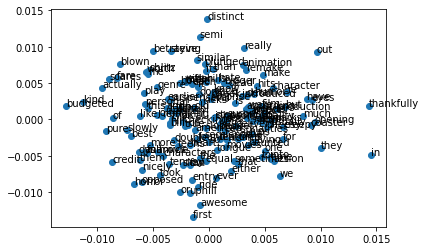

In [76]:
import matplotlib
from matplotlib import pyplot
from sklearn.decomposition import PCA


### Pour cela on a besoin de récuperer le vocabulaire
Z = model[model.wv.vocab]

## utiise ue PCA 
pca = PCA(n_components=2)
result = pca.fit_transform(Z)

# on dessine le résultat de la projection
pyplot.scatter(result[:,0],result[:,1])

# On annote les points par les noms des termes.
words = list(model.wv.vocab)
for i, word in enumerate(words):
   pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()




# Construction d'un fichier TF*IDF

In [ ]:
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os
# Create gensim dictionary form a single tet file
dictionary = corpora.Dictionary(simple_preprocess(line, deacc=True) for line in open('data/dataN7/text_file1.txt', encoding='utf-8'))

dictionary.token2id

In [ ]:
min_count = 0
size = 50
window = 3
corpus=[]

#construire son propre w2Vec
for sentence in texte:
    corpus.append(sentence.split())
    model = Word2Vec(corpus, min_count=min_count, size=size, window=window)

#pprint(model.most_similar('the'))
# appeler un W2Vec 
#print("début")
#model = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin', binary=True)

#pprint("fin")
#pprint(model.most_similar('hello'))
#pprint("fin2")                                                     
#tokens_s=[]
#for token in texte:
    # tokens_s.append(stemmer.stem(token))
    # tokens_s.append(lemmatizer.lemmatize(token))